In [16]:
import requests
import pandas as pd
import numpy as np

# Define function to fetch wind speed data from NASA POWER API
def fetch_wind_speed(lat, lon, start_year, end_year):
    """
    Fetch hourly wind speed data from NASA POWER API for a specific location and date range.

    Args:
        lat (float): Latitude of the location.
        lon (float): Longitude of the location.
        start_year (int): Start year (e.g., 2016).
        end_year (int): End year (e.g., 2020).

    Returns:
        pd.DataFrame: DataFrame with wind speed data.
    """
    base_url = "https://power.larc.nasa.gov/api/temporal/hourly/point"
    params = {
        "parameters": "WS10M",  # Wind speed at 10 meters
        "community": "RE",
        "longitude": lon,
        "latitude": lat,
        "start": f"{start_year}0101",
        "end": f"{end_year}1231",
        "format": "JSON",
    }

    response = requests.get(base_url, params=params)

    if response.status_code != 200:
        raise Exception(f"API request failed with status code {response.status_code}: {response.text}")

    data = response.json()["properties"]["parameter"]["WS10M"]

    # Convert JSON data to DataFrame
    wind_speed_df = pd.DataFrame(list(data.items()), columns=["DateTime", "Wind Speed (m/s)"])
    wind_speed_df["DateTime"] = pd.to_datetime(wind_speed_df["DateTime"], format="%Y%m%d%H")

    return wind_speed_df

# Define location (Karachi coordinates) and time range
latitude = 24.8607
longitude = 67.0011
start_year = 2016
end_year = 2020

# Fetch wind speed data
try:
    wind_speed_data = fetch_wind_speed(latitude, longitude, start_year, end_year)
    print(wind_speed_data.head())
    # Save data to CSV
    wind_speed_data.to_csv("custom_wind.csv", index=False)
    print("Wind speed data saved to 'custom_wind.csv'.")
except Exception as e:
    print(f"Error: {e}")


             DateTime  Wind Speed (m/s)
0 2016-01-01 00:00:00              4.37
1 2016-01-01 01:00:00              4.37
2 2016-01-01 02:00:00              4.40
3 2016-01-01 03:00:00              4.43
4 2016-01-01 04:00:00              4.47
Wind speed data saved to 'custom_wind.csv'.


In [20]:
# Check date range in the daily wind speeds data
start_date = daily_wind_speeds["Date"].min()
end_date = daily_wind_speeds["Date"].max()

print(f"Date range of wind speed data: {start_date} to {end_date}")


Date range of wind speed data: 2016-01-01 to 2020-12-31


In [8]:
import pandas as pd

# Load the CSV file
wind_data = pd.read_csv("custom_wind.csv")

# Display the first 10 rows
print(wind_data.head(24))

               DateTime  Wind Speed (m/s)
0   2016-01-01 00:00:00              4.37
1   2016-01-01 01:00:00              4.37
2   2016-01-01 02:00:00              4.40
3   2016-01-01 03:00:00              4.43
4   2016-01-01 04:00:00              4.47
5   2016-01-01 05:00:00              4.50
6   2016-01-01 06:00:00              4.48
7   2016-01-01 07:00:00              5.09
8   2016-01-01 08:00:00              4.52
9   2016-01-01 09:00:00              4.14
10  2016-01-01 10:00:00              2.73
11  2016-01-01 11:00:00              1.58
12  2016-01-01 12:00:00              0.95
13  2016-01-01 13:00:00              0.78
14  2016-01-01 14:00:00              1.14
15  2016-01-01 15:00:00              1.56
16  2016-01-01 16:00:00              2.00
17  2016-01-01 17:00:00              2.26
18  2016-01-01 18:00:00              2.10
19  2016-01-01 19:00:00              1.75
20  2016-01-01 20:00:00              1.33
21  2016-01-01 21:00:00              0.94
22  2016-01-01 22:00:00           

In [21]:
import pandas as pd

# Load the CSV file
wind_data = pd.read_csv("custom_wind.csv")

# Convert the 'DateTime' column to datetime objects
wind_data['DateTime'] = pd.to_datetime(wind_data['DateTime'])

# Extract the date from the 'DateTime' column
wind_data['Date'] = wind_data['DateTime'].dt.date

# Group by 'Date' and calculate the mean wind speed for each day
daily_mean_wind_speeds = wind_data.groupby('Date')['Wind Speed (m/s)'].mean()

# Display the daily mean wind speeds
print(daily_mean_wind_speeds)

Date
2016-01-01    2.725833
2016-01-02    1.883750
2016-01-03    2.566667
2016-01-04    3.776250
2016-01-05    2.445417
                ...   
2020-12-27    5.648333
2020-12-28    2.377500
2020-12-29    3.708333
2020-12-30    4.635833
2020-12-31    4.620833
Name: Wind Speed (m/s), Length: 1827, dtype: float64


In [9]:
# Find the maximum and minimum wind speeds
max_speed = wind_data["Wind Speed (m/s)"].max()
min_speed = wind_data["Wind Speed (m/s)"].min()

# Print the results
print(f"Maximum Wind Speed: {max_speed} m/s")
print(f"Minimum Wind Speed: {min_speed} m/s")

Maximum Wind Speed: 12.73 m/s
Minimum Wind Speed: 0.04 m/s


In [10]:
# Calculate the average wind speed over all 4 years
average_speed = wind_data["Wind Speed (m/s)"].mean()

# Print the result
print(f"Average Wind Speed over 5 years: {average_speed:.2f} m/s")


Average Wind Speed over 5 years: 4.32 m/s


In [11]:
# Convert the timestamp to a datetime object if not already
wind_data['Date'] = pd.to_datetime(wind_data['DateTime']).dt.date

# Group by Date and find daily minimum and maximum wind speeds
daily_stats = wind_data.groupby('Date')['Wind Speed (m/s)'].agg(['min', 'max'])

# Calculate the average of daily minimums and maximums
average_daily_min = daily_stats['min'].mean()
average_daily_max = daily_stats['max'].mean()

# Print the results
print(f"Average of Daily Minimum Wind Speeds: {average_daily_min:.2f} m/s")
print(f"Average of Daily Maximum Wind Speeds: {average_daily_max:.2f} m/s")


Average of Daily Minimum Wind Speeds: 2.71 m/s
Average of Daily Maximum Wind Speeds: 5.82 m/s


In [12]:
import pandas as pd
turbine_data = {
    "Turbine_ID": ["t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10"],
    "Rated_Power_kW": [225, 1.0, 2.0, 3.0, 6.0, 12.0, 20.0, 30.0, 50.0, 100.0],
    "Cut_in_Speed_m/s": [4, 2.0, 2.0, 4.0, 2.0, 2.5, 3.0, 3.0, 3.5, 2.5],
    "Cut_out_Speed_m/s": [25, 25.0, 25.0, 17.0, 15.0, 15.0, 25.0, 20.0, 20.0, 20.0],
    "Rated_Speed_m/s": [13, 11.0, 13.0, 13.0, 12.0, 12.0, 9.0, 10.0, 9.5, 10.0],
    "Rotor_Diameter_m": [29, 2.0, 2.0, 3.3, 4.0, 5.8, 13.2, 13.2, 17.0, 25.0],
    "Power_Curve_kW": [
        [0.0, 0.0, 0.0, 7.10, 20.50, 38.30, 61.90, 92.20, 127.90, 164.90, 196.40, 216.00, 223.0, 225.0, 225.0],
        [0.0, 0.0, 0.02, 0.05, 0.10, 0.17, 0.26, 0.39, 0.56, 0.77, 1.00, 1.00, 1.00, 1.00, 1.00],
        [0.0, 0.0, 0.03, 0.06, 0.12, 0.20, 0.32, 0.47, 0.67, 0.92, 1.23, 1.60, 2.00, 2.00, 2.00],
        [0.0, 0.0, 0.03, 0.06, 0.13, 0.24, 0.40, 0.62, 0.92, 1.31, 1.82, 2.39, 3.07, 3.60, 3.60],
        [0.0, 0.01, 0.10, 0.25, 0.50, 0.80, 1.25, 2.00, 2.80, 3.80, 5.00, 6.00, 6.00, 6.00, 6.00],
        [0.0, 0.01, 0.10, 0.50, 1.20, 2.00, 3.25, 5.00, 7.10, 9.50, 11.00, 12.00, 12.00, 12.00, 12.00],
        [0.0, 0.0, 2.0, 4.0, 6.0, 9.0, 13.0, 16.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0],
        [0.0, 0.0, 2.0, 4.0, 6.0, 9.0, 13.0, 16.0, 20.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0],
        [0.0, 2.0, 4.0, 9.0, 12.0, 16.0, 23.0, 32.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0],
        [0.0, 5.0, 10.0, 17.0, 25.0, 34.0, 50.0, 63.0, 81.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
    ]
}

# Create a DataFrame
TD = pd.DataFrame(turbine_data)

# Display the DataFrame
print(TD.head())


  Turbine_ID  Rated_Power_kW  Cut_in_Speed_m/s  Cut_out_Speed_m/s  \
0         t1           225.0               4.0               25.0   
1         t2             1.0               2.0               25.0   
2         t3             2.0               2.0               25.0   
3         t4             3.0               4.0               17.0   
4         t5             6.0               2.0               15.0   

   Rated_Speed_m/s  Rotor_Diameter_m  \
0             13.0              29.0   
1             11.0               2.0   
2             13.0               2.0   
3             13.0               3.3   
4             12.0               4.0   

                                      Power_Curve_kW  
0  [0.0, 0.0, 0.0, 7.1, 20.5, 38.3, 61.9, 92.2, 1...  
1  [0.0, 0.0, 0.02, 0.05, 0.1, 0.17, 0.26, 0.39, ...  
2  [0.0, 0.0, 0.03, 0.06, 0.12, 0.2, 0.32, 0.47, ...  
3  [0.0, 0.0, 0.03, 0.06, 0.13, 0.24, 0.4, 0.62, ...  
4  [0.0, 0.01, 0.1, 0.25, 0.5, 0.8, 1.25, 2.0, 2....  


In [13]:
# Convert DateTime to pandas datetime format
wind_data['DateTime'] = pd.to_datetime(wind_data['DateTime'])

# Calculate daily average wind speed
wind_data['Date'] = wind_data['DateTime'].dt.date
daily_wind_speeds = wind_data.groupby('Date')['Wind Speed (m/s)'].mean().reset_index()
daily_wind_speeds.rename(columns={'Wind Speed (m/s)': 'Avg_Wind_Speed_m/s'}, inplace=True)


In [18]:
# Function to calculate swept area
def calculate_swept_area(diameter):
    radius = diameter / 2
    return np.pi * (radius ** 2)

# Function to calculate daily energy production
def calculate_daily_energy(avg_wind_speed, turbine_factors, power_curve):
    rated_power, cutin_speed, cutout_speed, rated_speed, rotor_diameter = turbine_factors

    # Calculate swept area
    swept_area = calculate_swept_area(rotor_diameter)

    # If wind speed is outside the turbine's operational range
    if avg_wind_speed < cutin_speed or avg_wind_speed >= cutout_speed:
        return 0.0

    # Calculate power output
    if cutin_speed <= avg_wind_speed < rated_speed:
        # Interpolate power from the power curve
        power_index = int(avg_wind_speed) - 1  # Index matches wind speed (1 m/s at index 0)
        power_output = power_curve[power_index]
    else:
        # Use rated power within operational range
        power_output = rated_power

    # Convert power (kW) to energy (kWh) over 24 hours
    return power_output * 24

# Create a list to store daily energy for each turbine
daily_energy_data = {}

# Iterate through each turbine
for idx, turbine in TD.iterrows():
    turbine_id = turbine["Turbine_ID"]
    turbine_factors = [
        turbine["Rated_Power_kW"],
        turbine["Cut_in_Speed_m/s"],
        turbine["Cut_out_Speed_m/s"],
        turbine["Rated_Speed_m/s"],
        turbine["Rotor_Diameter_m"],
    ]
    power_curve = turbine["Power_Curve_kW"]

    # Calculate daily energy for this turbine
    daily_energy = []
    for _, row in daily_wind_speeds.iterrows():
        avg_wind_speed = row["Avg_Wind_Speed_m/s"]
        energy = calculate_daily_energy(avg_wind_speed, turbine_factors, power_curve)
        daily_energy.append(energy)

    # Store the daily energy list for this turbine
    daily_energy_data[turbine_id] = daily_energy

# Print the daily energy data for each turbine
for turbine_id, energy_list in daily_energy_data.items():
    print(f"Turbine {turbine_id} Daily Energy (kWh):")
    print([f'{energy:.2f}' for energy in energy_list])  # Format each energy value
    print()


Turbine t1 Daily Energy (kWh):
['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '170.40', '492.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '170.40', '492.00', '170.40', '170.40', '0.00', '0.00', '0.00', '0.00', '492.00', '492.00', '170.40', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '170.40', '0.00', '0.00', '0.00', '0.00', '0.00', '170.40', '170.40', '492.00', '170.40', '0.00', '0.00', '0.00', '492.00', '492.00', '919.20', '492.00', '0.00', '0.00', '170.40', '170.40', '170.40', '0.00', '0.00', '0.00', '170.40', '492.00', '170.40', '492.00', '492.00', '919.20', '170.40', '492.00', '492.00', '170.40', '170.40', '0.00', '170.40', '492.00', '170.40', '492.00', '492.00', '492.00', '919.20', '1485.60', '170.40', '170.40', '17

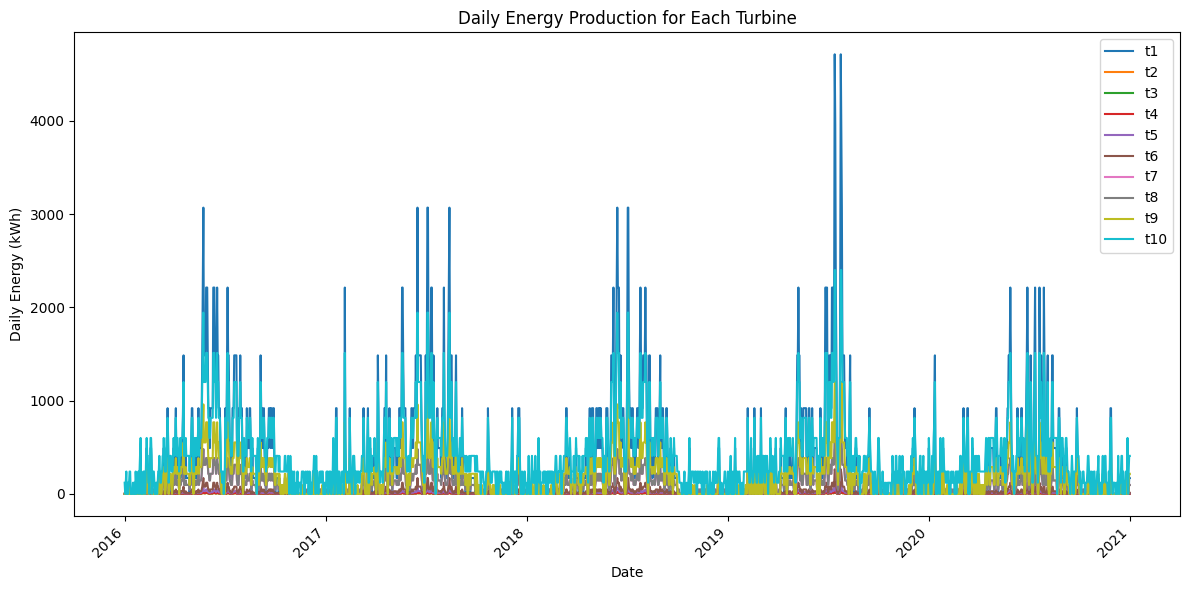

In [19]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed

# Plot daily energy for each turbine
for turbine_id, energy_list in daily_energy_data.items():
    ax.plot(daily_wind_speeds['Date'], energy_list, label=turbine_id)

# Set plot labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Daily Energy (kWh)")
ax.set_title("Daily Energy Production for Each Turbine")

# Add a legend
ax.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()